In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

trd = pd.read_csv('train.csv')
tsd = pd.read_csv('test.csv')
df = pd.concat([trd, tsd], ignore_index=True, sort = False)

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Транспонируем, если колонок много
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
PassengerId,1,2,3,4,5,6,7,8,9,10
Survived,0,1,1,1,0,0,0,0,1,1
Pclass,3,1,3,1,3,3,1,3,3,2
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)"
Sex,male,female,female,female,male,male,male,male,female,female
Age,22,38,26,35,35,NaN,54,2,27,14
SibSp,1,1,0,1,0,0,0,3,0,1
Parch,0,0,0,0,0,0,0,1,2,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708


In [4]:
df.shape

(1309, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
#Статистика по всем
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [7]:
#Статистика по колонке
pd.DataFrame(df.Age.describe())

,Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [8]:
print('Число строк в фрейме: {0}'.format(len(df)))
print('Число строк без пропущенных значений: {0}'.format(len(df.dropna(how='any'))))

Число строк в фрейме: 1309
Число строк без пропущенных значений: 183


In [9]:
#Агрегирование. Подсчет количества записей
df.groupby('Age').count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
0.17,1,0,1,1,1,1,1,1,1,0,1
0.33,1,0,1,1,1,1,1,1,1,0,1
0.42,1,1,1,1,1,1,1,1,1,0,1
0.67,1,1,1,1,1,1,1,1,1,0,1
0.75,3,2,3,3,3,3,3,3,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...
70.50,1,1,1,1,1,1,1,1,1,0,1
71.00,2,2,2,2,2,2,2,2,2,1,2
74.00,1,1,1,1,1,1,1,1,1,0,1


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

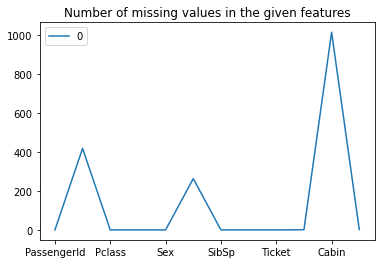

In [10]:
#Проверка на недостающие значения
pd.DataFrame(df.isnull().sum()).plot.line().set_title("Number of missing values in the given features")
df.isnull().sum()

Text(0.5, 1.0, 'Missing values heatmap')

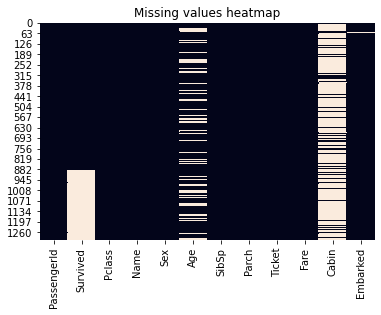

In [11]:
#Тепловая карта пропущенных значений
df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [12]:
#Проверка на уникальные значения
df.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [13]:
#Проверка уникальных значений в колонке
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

In [14]:
#кросс-таблица (таблица сопряжённости)
pd.crosstab(df['Survived'], df['Sex'])

Sex,female,male
Survived,,
0.0,81,468
1.0,233,109


In [15]:
print('Число строк в фрейме: {0}'.format(len(df)))

Число строк в фрейме: 1309


In [16]:
#Разбиение переменных на категории и выделение в новый столбец 
df['Rich'] = pd.cut(df['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid', 'High_Mid','High'])

In [17]:
df['Rich'].value_counts()

High_Mid    338
Low         320
Mid         310
High        256
Name: Rich, dtype: int64

In [20]:
#Средние показатель выборки по определенному параметру
df[df['Survived'] == 1]['Age'].mean()


#Условие может быть составным
df[(df['Survived'] == 1) & (df['Sex'] == "female")]['Fare'].mean()

51.93857339055791

In [ ]:
#Выбираем из матрицы интересующую нас ячейку
first_patient = df.loc[0, 'data']

In [ ]:
#Выбираем срез из матрицы по интересующим нас колонкам 
df.loc[:10, ["data1", "data2"]]

In [ ]:
#Строим график по распределению значений в колонке
(df.Data.value_counts(normalize=True) * 100).plot.barh().set_title(
    "Training Data - Percentage of people survived and Deceased")

In [ ]:
# Строим картинку
df['Survived'].value_counts().plot(kind='bar')
# Добавляем подпись
plt.title(u'Число выживших на Титанике')
plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation=None)
plt.text(-0.1, 275, '61.5%', fontsize=15, color='silver')
plt.text(0.9, 150, '38.5%', fontsize=15, color='silver');

In [ ]:
# Хак для того, чтобы исправить наезжающие заголовки графика
ax.get_figure().suptitle('')

# Нужно, чтобы подписи к картинкам отображались корректно по-русски
matplotlib.rc('font', family='Arial')

#Доля выживших на Титанике
fig, ax = plt.subplots(1)
df['Survived'].value_counts().plot(kind='pie', labels=['', ''],
                                   ax=ax, autopct='%.2f%%', fontsize=15)
ax.set_title(u'Доля выживших на Титанике')
ax.axis('equal')
ax.legend(labels=[u'Выжили', u'Погибли'], framealpha=0)
ax.set_ylabel('')
plt.tight_layout()

In [ ]:
#Подробное распределение внутри класса по определенным параметрам
plt.figure(figsize=(15, 8)) # увеличим размер картинки
sns.countplot(y='data', hue='data1', data=df);

In [ ]:
#Круговая диаграмма распределения значений в колонке
df.Data.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], 
                                                         loc='center right', 
                                                         bbox_to_anchor=(2.25, 0.5)
                                                        ).set_title("Training Data - People travelling in different classes")

In [ ]:
#График сравнения значений в колонках по дополнительному признаку из другой колонки. В процентах

data1 = round((df[df.Data == 1].Survived == 1).value_counts()[1]/len(df[df.Data == 1]) * 100, 2)
data2 = round((df[df.Data == 2].Survived == 1).value_counts()[1]/len(df[df.Data == 2]) * 100, 2)
data3 = round((df[df.Data == 3].Survived == 1).value_counts()[1]/len(df[df.Data == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"Class 1": data1,"Class 2": data2, "Class 3": data3},  
     "Percentage Not Survived":{"Class 1": 100-data1,"Class 2": 100-data2, "Class 3": 100-data3}})
pclass_perc_df.plot.bar().set_title("Training Data - Percentage of people survived on the basis of class")

In [ ]:
#Вариант графика сравнения, две бинарных переменных
df['data_new'] = pd.cut(df.Data, [0, 10, 20, 30, 40, 50, 60, 70, 80])
sns.countplot(x = "data_new", 
              hue = "data1", 
              data = df, 
              palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"]
              )

In [ ]:
#График распределения переменных по характеристике второй переменной
for x in [1,2,3]:    #задаем число классов
    df.data0[df.data1 == x].plot(kind="kde")
plt.title("Age density in classes")
plt.legend(("1st","2nd","3rd"))

In [ ]:
#Вариант графика сравнения, две бинарных переменных
sns.distplot(df['data'].dropna(),
             color='darkgreen',
             bins=30
            )

In [ ]:
#Вероятностная гистограмма 
df['data'].hist(density=True, bins=60)
#Сравнение гистограмм
df.groupby('data')['data'].plot.hist(alpha=.6)
plt.legend()

In [ ]:
#Линейная гистограмма
ss = pd.DataFrame()
ss['survived'] = df.Data1
ss['sibling_spouse'] = pd.cut(df.Data2, [0, 1, 2, 3, 4, 5, 6, 7, 8], include_lowest = True)
(ss.sibling_spouse.value_counts()).plot.area().set_title("Training Data - Number of siblings or spouses vs survival count")

In [ ]:
#Проверка на тип тренда (линейный или нет), тип сезонности (аддитивный или мультипликативный), его длину, выбросы
#Видим линейный тренд и мультипликативную сезонность. Это подтверждает логирафмирование цикла

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df['data'].plot(ax=ax1)
ax1.set_title(u'Объём пассажироперевозок')
ax1.set_ylabel(u'Тысяч человек')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df['data'])).plot(ax=ax2)
ax2.set_title(u'log10 от объёма пассажироперевозок')
ax2.set_ylabel(u'log10 от тысяч человек')

In [ ]:
#Быстрая проверка по интересующим нас данным. Перебор -> результат
age = df['data']
age[age < 22].shape[0]

In [ ]:
#В случае очевидного смешения двух нормальных распределений, можно оценить их более подробно
df.groupby('data')['data1'].plot.hist(alpha=0.6)
df.groupby('data')['data1'].plot.hist(density=True) #Нормализованный вариант
plt.legend(loc='upper left')

In [ ]:
#Боксплот
sns.boxplot(x=df['data']);

In [ ]:
#Первый признак разбивает на классы, второй дает среднее значение параметра по группе
df.groupby('data')['data1'].mean().round().plot(kind='bar') 
plt.ylabel('Age') # добавляем подпись на оси Оу
plt.show();

In [ ]:
#Матрица диаграмм рассеивания: комплексное сравнение по нескольким переменным. Диагональ - ядерная оценка плотности
colors = {'genuine': 'green', 'counterfeit': 'red'}
scatter_matrix(df,               
               figsize=(6, 6), #размер картинки
               diagonal='kde', #плотность вместо гистограммы на диагонали
               c=df['data'].replace(colors),  #цвета классов
               alpha=0.2 #степень прозрачности точек
              )

In [ ]:
#Scatter плот для исследования пар числовых признаков
plt.scatter(df['Sex'], df['Pclass']);
#Для изучения совместного распределения двух числовых признаков
sns.jointplot(x='height', y='weight', data=df);

In [ ]:
#Для исследования трёх и более признаков сводные таблицы (pivot tables)
#Index - признаки, по которым выполняется группировка. Values - признаки, по которым вычисляются значения функции
df.pivot_table(values=['age', 'cardio'], index=['smoke', 'alco'], aggfunc='mean')

In [ ]:
#Анализ объектов в колонке. Выделение уникальных, сплит по знакам и выделение в отдельную колонку 

df['data_new'] = df.Data.apply(lambda name: name.split(',')[1].split('.')[0].strip()) 
df.Data.nunique()

In [ ]:
#Построение облачного графика из объектов, где размер коррелирует с частотой
wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(str(df.Data_new.values))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

df.Data_new.value_counts()